In [2]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('titanic')

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#average of age for child category 
#locating the cells using loc[row,column]
print(data.loc[data['who']=='child','age'].mean())

#locating the lines where who=child, and fillna
data.loc[data['who']=='child','age'].fillna(data.loc[data['who']=='child','age'].mean(),inplace=True)

#checking that there are no more null values
data[(data['age'].isnull()==True) & (data['who']=='child')]

6.369518072289157


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [ ]:
data.loc[data['who']=='man','age']=data.loc[data['who']=='man','age'].fillna(data.loc[data['who']=='man','age'].mean())

data[(data['age'].isnull()==True) & (data['who']=='man')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [ ]:
data.loc[data['who']=='woman','age']=data.loc[data['who']=='woman','age'].fillna(data.loc[data['who']=='woman','age'].mean())

data[(data['age'].isnull()==True) & (data['who']=='woman')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [5]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_coffeeshop.csv to data_coffeeshop.csv
User uploaded file "data_coffeeshop.csv" with length 720230 bytes


In [6]:
df = pd.read_csv('data_coffeeshop.csv', header='infer',na_values=[' '])
df.head()

,yearOfStart,CurrentState,sizeOfsite
0,2008.0,In,20.80
1,2010.0,In,212.72
2,2013.0,In,20.04
3,2012.0,In,64.17
4,2002.0,Out,11.40


(1997.0, 2014.0)

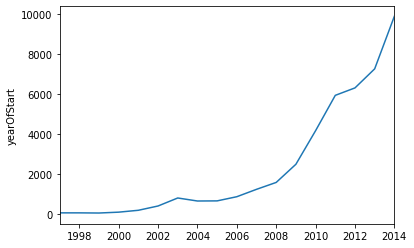

In [ ]:
import matplotlib.pyplot as plt

df.yearOfStart.value_counts() # <-- this gives a serie (by default orderded by frequencies in descending order) 
                                      # The indexes of the serie are the years, the values of the series are frequencies
sns.lineplot(x=df.yearOfStart.value_counts().index, y=df.yearOfStart.value_counts())
plt.xlim(1997,2014)

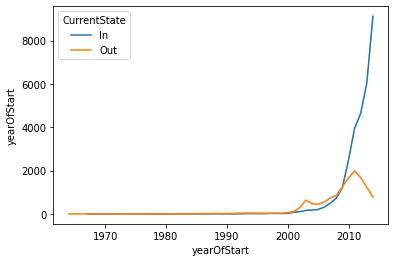

In [8]:
sns.lineplot(x="yearOfStart",y=df.groupby(["yearOfStart","CurrentState"])["yearOfStart"].transform("size"),hue="CurrentState",data=df)

In [ ]:
sns.barplot(x="Survived",y=data.groupby(['Survived','Sex'])['PassengerId'].transform('count'),data=data)